meata machine_learning baseline:

1.针对二分类(后续加入多分类和回归)

2.包含逻辑回归，决策树，随机森林，xgboost模型

3.可根据需求自动调整超参数

待改进：
1.加入特征工程
2.加入多分类分析
3.加入回归分析
4.加入神经网络方法(tensorflow框架)

以肿瘤病人预测为例

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [277]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 数据处理

In [24]:
data = pd.read_table("./austria.crc.crc_control.input.trans.profile.new2",header=None)
data1 = data.T

In [25]:
x_df=data1.loc[1:,3:].drop(3,axis=1)

In [26]:
y_df=data1.loc[1:,2]

In [7]:
labelencoder=LabelEncoder()

In [27]:
y_hat=labelencoder.fit_transform(y_df)

In [28]:
x_df=pd.DataFrame(x_df,dtype=np.float)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_df,y_hat,test_size=0.2,random_state=4)

## 逻辑回归

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
lr_model= LogisticRegression()

In [23]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_prob = lr_model.predict_proba(X_test)[:,1]

In [25]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [26]:
lr_model.score(X_test, y_pred)

1.0

In [27]:
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.40      0.50      0.44         8
          1       0.67      0.57      0.62        14

avg / total       0.57      0.55      0.55        22

0.5357142857142857


### 超参树调整

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lr_model2= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000] ,
              'penalty':['l1','l2']
                   }

In [49]:
from sklearn.model_selection import GridSearchCV
LR= GridSearchCV(lr_model2, tuned_parameters,cv=10)

In [50]:
LR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
print(LR.best_params_)

{'C': 100, 'penalty': 'l1'}


In [52]:
y_prob = LR.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)
LR.score(X_test, y_pred)

1.0

In [20]:
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.71      0.62      0.67         8
          1       0.80      0.86      0.83        14

avg / total       0.77      0.77      0.77        22

0.7410714285714286


## 决策树

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree_model = DecisionTreeClassifier()

In [27]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_prob = tree_model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
tree_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
metrics.roc_auc_score(y_test,y_pred)
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.71      0.62      0.67         8
          1       0.80      0.86      0.83        14

avg / total       0.77      0.77      0.77        22

0.7410714285714286


### 超参数调整

In [30]:
tree_model2 = DecisionTreeClassifier()
tuned_parameters= { 'max_features': ["auto","sqrt","log2"],
                  'min_samples_leaf': range(1,10,1) , 'max_depth': range(1,10,1)
                  }

In [31]:
TM = GridSearchCV(tree_model2, tuned_parameters,cv=10)

In [32]:
TM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
print(TM.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3}


In [45]:
y_prob = TM.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
TM.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         8
          1       1.00      0.71      0.83        14

avg / total       0.88      0.82      0.82        22

0.8571428571428572


## 随机森林

In [46]:
from sklearn.ensemble import RandomForestClassifier

/Users/shizhiluo/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
rr_model=RandomForestClassifier()

In [54]:
rr_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_prob = rr_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rr_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.75      0.75      0.75         8
          1       0.86      0.86      0.86        14

avg / total       0.82      0.82      0.82        22

0.8035714285714285


### 超参数调整

In [63]:
RR = GridSearchCV(model_RR, tuned_parameters,cv=10)
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [65]:
RR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
y_prob = RR.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)
RR.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.60      0.75      0.67         8
          1       0.83      0.71      0.77        14

avg / total       0.75      0.73      0.73        22

0.7321428571428572


## XGBoost

In [ ]:
#from sklearn import preprocessing
#lbl = preprocessing.LabelEncoder()
#train_x['acc_id1'] = lbl.fit_transform(train_x['acc_id1'].astype(str))#将提示的包含错误数据类型这一列进行转换

In [13]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier()

In [14]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
y_prob = XGB_model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
XGB_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.71      0.62      0.67         8
          1       0.80      0.86      0.83        14

avg / total       0.77      0.77      0.77        22

0.7410714285714286


/Users/shizhiluo/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
print(model_XGB.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.0285297  0.         0.         0.         0.         0.00524615
 0.         0.         0.         0.         0.         0.
 0.01947274 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01237625
 0.00628219 0.         0.         0.         0.         0.
 0.         0.         0.         0.00274954 0.         0.
 0.         0.         0.         0.0084788  0.         0.
 0.00349184 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03759316
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

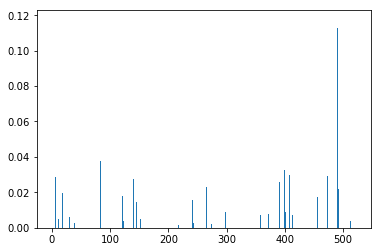

In [17]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
pyplot.show()

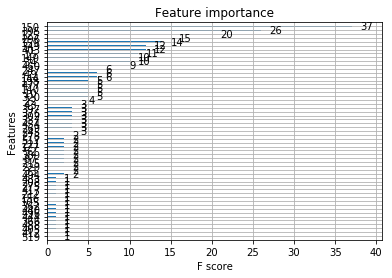

In [18]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(XGB_model)
pyplot.show()

In [29]:
help(plot_importance)

Help on function plot_importance in module xgboost.plotting:

plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)
    Plot importance based on fitted trees.
    
    Parameters
    ----------
    booster : Booster, XGBModel or dict
        Booster or XGBModel instance, or dict taken by Booster.get_fscore()
    ax : matplotlib Axes, default None
        Target axes instance. If None, new figure and axes will be created.
    grid : bool, Turn the axes grids on or off.  Default is True (On).
    importance_type : str, default "weight"
        How the importance is calculated: either "weight", "gain", or "cover"
    
        * "weight" is the number of times a feature appears in a tree
        * "gain" is the average gain of splits which use the feature
        * "cover" is the average coverage of splits which use the featu

###  特征选择

In [153]:
x_df=pd.DataFrame(x_df,dtype=np.float)
x_df.head()

,4,5,6,7,8,9,10,11,12,13,...,517,518,519,520,521,522,523,524,525,526
1,0.0,0.0,0.0,0.00485,0.00000,0.00000,0.00000,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.09095,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00368,0.00341,0.00000,0.00565,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00043,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.05959,0.00000,0.00000,0.00025,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.05034,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.01150,0.0,0.0,0.0,...,0.25715,19.33382,0.00000,0.33503,0.0,0.00000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.07911,0.00000,0.00039,0.04888,0.0,0.0,0.0,...,0.51496,0.00000,0.08936,0.04593,0.0,0.00041,0.0,0.0,0.0,0.0


In [154]:
x_df_drop95 = x_df.loc[:, (x_df == 0).sum(axis=0) / len(data1) < 0.95] # 某菌株在95%及以上的样本中表达量为0，则剔除该菌株
x_df_drop95.head()
#x_df_drop0.values

,4,5,6,7,8,9,10,11,13,14,...,510,512,513,514,517,518,519,520,521,522
1,0.0,0.0,0.0,0.00485,0.00000,0.00000,0.00000,0.0,0.0,0.0000,...,0.00000,0.00000,0.0,0.11937,0.00000,0.00000,0.00000,0.09095,0.0,0.00000
2,0.0,0.0,0.0,0.00368,0.00341,0.00000,0.00565,0.0,0.0,0.0000,...,0.00022,0.00384,0.0,0.01157,0.00000,0.00000,0.00000,0.00043,0.0,0.00000
3,0.0,0.0,0.0,0.05959,0.00000,0.00000,0.00025,0.0,0.0,0.0000,...,0.00000,0.00000,0.0,0.01080,0.00000,0.00000,0.00000,0.05034,0.0,0.00000
4,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.01150,0.0,0.0,0.0000,...,0.00000,0.00299,0.0,0.79082,0.25715,19.33382,0.00000,0.33503,0.0,0.00000
5,0.0,0.0,0.0,0.07911,0.00000,0.00039,0.04888,0.0,0.0,0.0019,...,0.04274,0.03359,0.0,0.09195,0.51496,0.00000,0.08936,0.04593,0.0,0.00041


In [155]:
x_df_drop50 = x_df.loc[:, (x_df == 0).sum(axis=0) / len(data1) < 0.5] # 某菌株在50%及以上的样本中表达量为0，则剔除该菌株
x_df_drop50.head()
#x_df_drop0.values

,7,10,18,27,33,34,43,49,52,60,...,477,486,487,499,502,509,512,514,517,520
1,0.00485,0.00000,0.34827,1.77326,0.11415,2.56049,0.00000,0.79781,0.04930,0.00331,...,0.49163,0.00113,0.88323,0.01551,0.00640,0.00833,0.00000,0.11937,0.00000,0.09095
2,0.00368,0.00565,0.94900,14.52639,0.00345,0.14303,0.00000,1.25799,0.00000,0.00976,...,0.14264,0.00112,0.00000,0.00000,0.00000,0.00927,0.00384,0.01157,0.00000,0.00043
3,0.05959,0.00025,5.28096,3.12677,0.04317,1.38858,0.00195,0.71169,0.00000,0.00385,...,0.74649,0.00000,0.02470,0.03396,0.00000,0.84578,0.00000,0.01080,0.00000,0.05034
4,0.00000,0.01150,0.07418,0.79501,0.15282,0.52605,0.04702,0.60461,0.04329,0.10949,...,1.39704,0.00296,0.76824,0.00000,0.00000,0.12486,0.00299,0.79082,0.25715,0.33503
5,0.07911,0.04888,0.02902,0.00114,0.00000,0.23759,0.00000,0.14101,0.09645,0.03103,...,0.34831,0.02853,0.00000,0.00000,0.00445,0.00128,0.03359,0.09195,0.51496,0.04593


In [156]:
y_hat
#len(y_hat)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 特征选择操作对象：x_df_drop95.values (y_hat)

### 1. 基于树模型的特征选择
可以采用随机森林的算法，通过树的模型训练可以计算每一个属性的重要性。重要性的值可以帮助我们选择出重要的特征。sklearn.ensemble模块包含了两种基于随机决策树的平均算法：RandomForest算法和Extra-Trees算法。这里使用Extra-Trees算法。

In [271]:
from sklearn.ensemble import ExtraTreesClassifier #导入ExtraTrees

In [272]:
model = ExtraTreesClassifier()
model.fit(x_df_drop95.values, y_hat)

D:\SoftwareOrTools\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [273]:
x_df_drop_extra_trees = x_df_drop95.loc[:, model.feature_importances_ > model.feature_importances_.mean()*1.5]#*0.75]
x_df_drop_extra_trees.head()

,5,8,9,16,18,22,25,27,31,43,...,474,476,481,484,494,496,499,509,512,520
1,0.0,0.00000,0.00000,0.00000,0.34827,0.0,0.37097,1.77326,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.00125,0.01551,0.00833,0.00000,0.09095
2,0.0,0.00341,0.00000,0.32866,0.94900,0.0,0.00000,14.52639,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.40418,0.00000,0.00000,0.00927,0.00384,0.00043
3,0.0,0.00000,0.00000,0.00000,5.28096,0.0,0.00000,3.12677,0.0,0.00195,...,0.0000,0.0,0.0,0.0,0.00000,0.00138,0.03396,0.84578,0.00000,0.05034
4,0.0,0.00000,0.00000,0.00000,0.07418,0.0,0.00000,0.79501,0.0,0.04702,...,0.0037,0.0,0.0,0.0,0.00946,0.08801,0.00000,0.12486,0.00299,0.33503
5,0.0,0.00000,0.00039,0.00000,0.02902,0.0,0.64515,0.00114,0.0,0.00000,...,0.0000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00128,0.03359,0.04593


### 2. 递归特征消除法
递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。它使用模型精度来识别哪些属性（和属性组合）对预测目标属性的贡献最大。可以通过sklearn库中的RFE来实现。

In [157]:
from sklearn.feature_selection import RFE #导入RFE库
from sklearn.linear_model import LogisticRegression #导入逻辑回归库

In [158]:
model = LogisticRegression() #设置算法为逻辑回归
rfe = RFE(model, 50)  #选择50个最佳特征变量，并进行RFE
fit = rfe.fit(x_df_drop95.values, y_hat) #进行RFE递归
##print(fit.n_features_)  #打印最优特征变量数
#print(fit.support_)  #打印选择的最优特征变量
##print(fit.ranking_) #特征消除排序

D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SoftwareOrTools\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [159]:
x_df_drop_rfe = x_df_drop95.loc[:, fit.support_]
x_df_drop_rfe.head()

,7,15,25,33,43,49,60,77,108,122,...,445,448,449,454,457,470,474,480,514,518
1,0.00485,2.73097,0.37097,0.11415,0.00000,0.79781,0.00331,0.00000,0.11551,0.00000,...,0.02410,0.00000,0.00000,1.48198,18.52238,0.79244,0.0000,0.00000,0.11937,0.00000
2,0.00368,0.00000,0.00000,0.00345,0.00000,1.25799,0.00976,0.00000,0.17017,0.00000,...,0.00541,0.00000,0.08543,0.07378,7.40952,1.12321,0.0000,0.00000,0.01157,0.00000
3,0.05959,0.85651,0.00000,0.04317,0.00195,0.71169,0.00385,0.00182,0.82452,0.02172,...,0.00626,0.03652,3.68212,0.01022,12.17483,1.88297,0.0000,0.00000,0.01080,0.00000
4,0.00000,0.00000,0.00000,0.15282,0.04702,0.60461,0.10949,0.00000,0.55321,0.00000,...,0.60408,1.04129,0.00000,0.17442,5.19832,1.02485,0.0037,0.00000,0.79082,19.33382
5,0.07911,0.00000,0.64515,0.00000,0.00000,0.14101,0.03103,0.00000,0.05492,0.00000,...,0.01045,0.00000,0.00000,0.10671,0.91530,0.00000,0.0000,0.07651,0.09195,0.00000


### 树模型-特征选择结果测试

In [274]:
X_train, X_test, y_train, y_test = train_test_split(x_df_drop_extra_trees,y_hat,test_size=0.2,random_state=3)

In [275]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier()

XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [276]:
y_prob = XGB_model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
XGB_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      1.00      0.92        12

   micro avg       0.91      0.91      0.91        22
   macro avg       0.93      0.90      0.91        22
weighted avg       0.92      0.91      0.91        22

0.9


In [247]:
from sklearn.ensemble import RandomForestClassifier
rr_model=RandomForestClassifier()
rr_model.fit(X_train,y_train)

D:\SoftwareOrTools\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [278]:
help(np.argmax)

Help on function argmax in module numpy.core.fromnumeric:

argmax(a, axis=None, out=None)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmax, argmin
    amax : The maximum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    
    Notes
    -----
    In case of multiple occurrences of the maximum values, the indices
    corresponding to the first occurrence ar

In [248]:
y_prob = rr_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# y_prob = rr_model.predict_proba(X_test)
# y_pred = np.argmax(axis=1)
rr_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print("log_loss",metrics.log_loss(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.83      0.83      0.83        12

   micro avg       0.82      0.82      0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.82      0.82      0.82        22

0.8166666666666668


### 递归特征消除-特征选择结果测试

In [249]:
X_train, X_test, y_train, y_test = train_test_split(x_df_drop_rfe,y_hat,test_size=0.2,random_state=3)
#X_train, X_test, y_train, y_test = train_test_split(x_df_drop_rfe,y_hat,test_size=0.2)

from xgboost import XGBClassifier
XGB_model=XGBClassifier()

XGB_model.fit(X_train,y_train)

y_prob = XGB_model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
XGB_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.80      1.00      0.89        12

   micro avg       0.86      0.86      0.86        22
   macro avg       0.90      0.85      0.86        22
weighted avg       0.89      0.86      0.86        22

0.85


In [250]:
X_test

,7,15,25,33,43,49,60,77,108,122,...,445,448,449,454,457,470,474,480,514,518
105,0.16984,0.27085,0.00000,0.12912,0.02177,2.11076,0.00100,0.00075,0.15438,0.01296,...,0.00345,0.00000,0.09500,0.31965,0.82725,0.08917,0.00000,0.00000,0.56510,0.00000
102,0.05177,0.10641,0.00000,0.10637,0.00156,4.84548,0.00000,0.00000,0.49320,0.00000,...,0.00700,0.00000,0.27157,0.09257,2.44377,0.35008,0.00000,0.00140,0.10347,0.00000
7,0.06540,0.00000,0.00000,0.00000,0.00000,1.28238,0.00083,0.00000,0.00000,0.00000,...,0.00620,0.00000,0.00152,0.00000,0.00000,0.00000,0.00000,0.00000,0.28685,0.00000
6,0.01006,0.73573,0.00000,0.05342,0.44844,1.06048,0.03988,0.00000,0.00000,0.00000,...,0.00695,0.00000,0.18278,0.18194,13.27147,2.07341,0.00000,0.00603,0.47008,0.00000
92,0.00954,0.00000,0.00000,0.38299,0.21314,0.96489,0.00000,0.00000,0.17725,0.00000,...,0.00000,0.00000,2.33288,0.35236,11.08944,1.11798,0.00000,0.00000,0.01278,0.00000
83,0.16424,0.00000,0.00000,0.10657,0.00000,1.31910,0.00000,0.00000,0.00000,0.00000,...,0.01005,0.00000,0.24068,0.04913,1.13743,0.01558,0.00000,0.00000,0.12459,0.00000
41,0.00000,0.00000,0.00000,0.43443,0.00000,0.76124,0.03199,0.00000,1.68083,0.00000,...,0.01136,0.00000,0.00000,1.87659,2.93204,1.01422,0.00000,0.00000,0.88332,0.00000
62,0.00914,0.00000,0.00000,0.16567,0.00391,15.23092,0.00000,0.00000,0.00585,0.00361,...,0.00746,0.00000,0.02198,0.01760,2.38908,0.49060,0.00000,0.00000,0.92949,0.00000
24,0.80834,0.00000,0.00000,0.11968,0.07458,2.38757,0.00000,0.00000,0.00000,0.00000,...,0.00217,0.00000,0.63634,0.04591,13.97461,3.86816,0.00614,0.13239,0.93357,0.00161
13,0.00000,0.00000,0.15829,0.00318,0.00000,2.07945,0.00049,0.00000,0.00060,0.00000,...,0.00200,0.00000,0.00000,0.03978,3.80088,2.56421,0.00000,0.00000,0.03275,0.00000


In [251]:
from sklearn.ensemble import RandomForestClassifier
rr_model=RandomForestClassifier()
rr_model.fit(X_train,y_train)

D:\SoftwareOrTools\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [252]:
y_prob = rr_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rr_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.83      0.87        12

   micro avg       0.86      0.86      0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22

0.8666666666666667


### 95% 0 drop-特征选择结果测试

In [253]:
X_train, X_test, y_train, y_test = train_test_split(x_df_drop95,y_hat,test_size=0.2,random_state=3)

In [254]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier()

XGB_model.fit(X_train,y_train)

y_prob = XGB_model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
XGB_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.80      1.00      0.89        12

   micro avg       0.86      0.86      0.86        22
   macro avg       0.90      0.85      0.86        22
weighted avg       0.89      0.86      0.86        22

0.85


In [255]:
from sklearn.ensemble import RandomForestClassifier
rr_model=RandomForestClassifier()
rr_model.fit(X_train,y_train)

y_prob = rr_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rr_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.92      0.96        12

   micro avg       0.95      0.95      0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22

0.9583333333333333


D:\SoftwareOrTools\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 50% 0 drop-特征选择结果测试

In [257]:
X_train, X_test, y_train, y_test = train_test_split(x_df_drop50,y_hat,test_size=0.2,random_state=3)

In [258]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier()

XGB_model.fit(X_train,y_train)

y_prob = XGB_model.predict_proba(X_test)[:,1] 
y_pred = np.where(y_prob > 0.5, 1, 0)
XGB_model.score(X_test, y_pred)
print(metrics.classification_report(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.85      0.92      0.88        12

   micro avg       0.86      0.86      0.86        22
   macro avg       0.87      0.86      0.86        22
weighted avg       0.87      0.86      0.86        22

0.8583333333333333
